## Нейросеть для California housing

Будем работать с набором данным `fetch_california_housing` из `sklearn`.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import classification_report
import pandas as pd
import plotly.graph_objects as go
import math
import numpy as np


data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head(n=10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

#### 1.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=125)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

#### 1.2. Создайте архитектуру для этой задачи

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std



In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(8, ), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1152      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics='mae')

#### 1.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)
history

Epoch 1/200
516/516 [==============================] - 2s 3ms/step - loss: 0.7803 - mae: 0.5778 - val_loss: 0.4589 - val_mae: 0.4997
Epoch 2/200
516/516 [==============================] - 1s 2ms/step - loss: 0.4619 - mae: 0.4763 - val_loss: 0.5947 - val_mae: 0.5446
Epoch 3/200
516/516 [==============================] - 1s 2ms/step - loss: 0.4191 - mae: 0.4552 - val_loss: 0.3901 - val_mae: 0.4405
Epoch 4/200
516/516 [==============================] - 1s 2ms/step - loss: 0.4019 - mae: 0.4441 - val_loss: 0.3820 - val_mae: 0.4421
Epoch 5/200
516/516 [==============================] - 1s 2ms/step - loss: 0.3787 - mae: 0.4326 - val_loss: 0.3877 - val_mae: 0.4662
Epoch 6/200
516/516 [==============================] - 1s 2ms/step - loss: 0.3674 - mae: 0.4262 - val_loss: 0.3657 - val_mae: 0.4420
Epoch 7/200
516/516 [==============================] - 1s 2ms/step - loss: 0.3604 - mae: 0.4203 - val_loss: 0.3460 - val_mae: 0.4208
Epoch 8/200
516/516 [==============================] - 1s 2ms/step - 

#### 1.5. Сделайте вывод, хорошо ли модель обучается?

Если модель обучается плохо, можете внести изменения в работу.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_mae'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Mean Absolute Error')

fig.show()

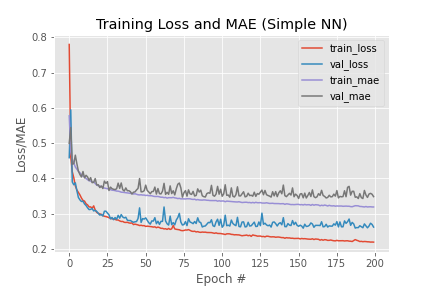

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("Agg")

N = np.arange(0, 200)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["mae"], label="train_mae")
plt.plot(N, history.history["val_mae"], label="val_mae")
plt.title("Training Loss and MAE (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/MAE")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))

P.S.: Сеть скорее всего обучается плохо, так как данные не масштабированы.

In [ ]:
# Ваш вывод здесь

#### 1.6. Сделайте предсказания на тестовых данных

In [ ]:
predictions = model.predict(X_test)
print(predictions)

129/129 [==============================] - 0s 2ms/step
[[3.5341372]
 [4.64155  ]
 [1.4610822]
 ...
 [2.9944282]
 [1.4688314]
 [1.8433063]]


In [ ]:
df2 = pd.DataFrame(y_test, columns = ['true'])
df3 = pd.DataFrame(predictions, columns = ['pred'])

In [ ]:
result = pd.concat([df2, df3], axis=1)
result.head(10)

,true,pred
0,3.66300,3.534137
1,5.00001,4.641550
2,1.07600,1.461082
3,3.44800,2.723342
4,2.48200,2.504189
5,2.25800,2.470680
6,2.31900,2.227986
7,2.53700,2.964216
8,1.80000,1.847047
9,2.99400,2.896398


#### 1.7. Посчитайте метрику качества на тестовых данных

In [ ]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

129/129 [==============================] - 0s 2ms/step - loss: 0.2621 - mae: 0.3485
Mean squared error on test data:  0.26213884353637695
Mean absolute error on test data:  0.3485370874404907
